<a href="https://colab.research.google.com/github/naokityokoyama/Deep_Learing/blob/main/Deep_Learning_Autoencoder_redu%C3%A7%C3%A3o_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input


In [81]:
(previsores_treinamento, _) , (previsores_teste, _) = mnist.load_data()   #_ pois nao queremos a saida

In [3]:
28*28

784

In [88]:
#normalizando os dados -> pode usar o minmaxscale
previsores_treinamento = previsores_treinamento.astype('float32')/255
previsores_teste = previsores_teste.astype('float32')/255

In [89]:
previsores_treinamento = previsores_treinamento.reshape(len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:]))# criado uma matriz com 60.000 instancia e 784 features
previsores_teste = previsores_teste.reshape(len(previsores_teste), np.prod(previsores_teste.shape[1:]))# criado uma matriz com 60.000 instancia e 784 features


In [84]:
#784 entrada e saida (caracteristica das autoencoder entrada igual a saida)
#reduziar 784 para 32 
fator_compactacao = 784/32
fator_compactacao

24.5

In [90]:
autoencoder = Sequential()
autoencoder.add(Dense(units=32, activation='relu', input_dim=784))
autoencoder.add(Dense(units=784, activation='sigmoid')) #usando sigmoid pois normalizamos os dados 

autoencoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_9 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [31]:
print (f'da camada de entrada temos 784 X 32 camada oculta + 32 baias total {784*32+32}')

print (f'da camada oculta temos 32 X 784 camada de saida + 784 baias total {32*784+784}')

print (f'Total de parametros, pesos {25120+25872}')

da camada de entrada temos 784 X 32 camada oculta + 32 baias total 25120
da camada oculta temos 32 X 784 camada de saida + 784 baias total 25872
Total de parametros, pesos 50992


In [91]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(previsores_treinamento, previsores_treinamento,epochs=50, batch_size=256, validation_data=(previsores_teste, previsores_teste))
#ao contrario do classico aqui a entrada compara com a saida por isso "ele mesmo" ->self supervised learning

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.3856 - accuracy: 0.0068 - val_loss: 0.1935 - val_accuracy: 0.0107
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1823 - accuracy: 0.0094 - val_loss: 0.1547 - val_accuracy: 0.0099
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1502 - accuracy: 0.0104 - val_loss: 0.1339 - val_accuracy: 0.0102
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1321 - accuracy: 0.0097 - val_loss: 0.1220 - val_accuracy: 0.0094
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1213 - accuracy: 0.0101 - val_loss: 0.1140 - val_accuracy: 0.0111
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1138 - accuracy: 0.0111 - val_loss: 0.1082 - val_accuracy: 0.0106
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1081 - accuracy: 0.0117 - val_loss: 0.1036 - val_accuracy: 0.0115
Epoch

Agora com modelo treinado precisando codificar usando o Model

é a parte onde as camadas de entrada passam para oculta (como se fosse os pesos)

In [92]:
dimensao_original = Input(shape=(784,))  #input é da camada de entrada 
camada_encoder =autoencoder.layers[0]  #o primeira camada e oculda onde faz a codificadao 

encoder = Model(dimensao_original, camada_encoder(dimensao_original))  #784 -> 32 -> 784
encoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [93]:
#codificando de para
imagens_codificadas = encoder.predict(previsores_teste)
imagens_codificadas.shape   #O teste que esstava em 784 foi para 32

(10000, 32)

In [94]:
#decodificando de para
imagens_decodificadas = autoencoder.predict(previsores_teste)
imagens_decodificadas.shape  #o teste que estava em 32 foi para 784

(10000, 784)

Grafico

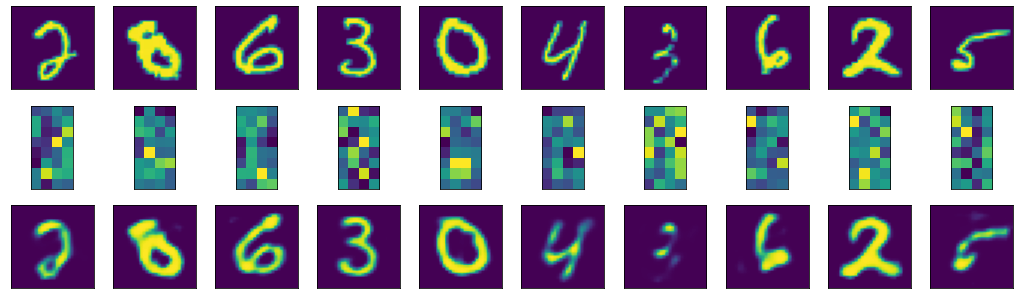

In [95]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size=numero_imagens)

plt.figure(figsize=(18,18))
for i, j in enumerate(imagens_teste):
  #print (i)
  #print (j)
  #imagem original
  eixo = plt.subplot(10,10, i + 1)
  plt.imshow(previsores_teste[j].reshape(28,28)) #tamanho original 
  plt.xticks(())
  plt.yticks(())

  #imagem codificada
  eixo = plt.subplot(10,10, i + 1 + numero_imagens)
  plt.imshow(imagens_codificadas[j].reshape(8,4)) #8x4=32
  plt.xticks(())
  plt.yticks(())

  #imagem decodificada
  eixo = plt.subplot(10,10, i + 1 + numero_imagens * 2)
  plt.imshow(imagens_decodificadas[j].reshape(28,28)) #tamanho original 
  plt.xticks(())
  plt.yticks(())
